# Cafe Sales Data Analysis using Pandas & Numpy

### 1. LOAD AND EXPLORE

In [6]:
import numpy as np
import pandas as pd


In [7]:
df = pd.read_csv(r"C:\Users\HP\Documents\dirty_cafe_sales.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [9]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

## 2. Data Cleaning & Preprocessing

In [10]:
df.replace(["ERROR", "UNKNOWN"], np.nan , inplace = True)

In [11]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [12]:
# df["Quantity"] = pd.to_numeric(df["Quantity"], errors  = 'coerce')

In [13]:
# df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors  = 'coerce')

In [14]:
# df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors  = 'coerce')

In [15]:
cols_to_float = ['Quantity', 'Price Per Unit', 'Total Spent']
for i in cols_to_float:
    df[i]  = pd.to_numeric(df[i], errors = 'coerce')

In [16]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors = 'coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [18]:
df.isnull().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

 *filling missing vlaues* 



In [48]:
df.fillna({
    'Quantity': df['Quantity'].median(),
    'Price Per Unit': df['Price Per Unit'].median()
}, inplace=True)


In [49]:
print(df["Quantity"].isna().sum()) 

0


*now lets fix total spent, just by recalculating it , if any thing is wrong in it*

In [50]:
df["Total Spent"] = df["Quantity"] * df["Price Per Unit"]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              9540 non-null   object        
 2   Quantity          9540 non-null   float64       
 3   Price Per Unit    9540 non-null   float64       
 4   Total Spent       9540 non-null   float64       
 5   Payment Method    9540 non-null   object        
 6   Location          9540 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
 8   item              9540 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 745.3+ KB


##### Fixing
- Item (969 missing)

>if few then we will drop it , 
but now lets fill it with , "Unknown Item"

- fixing payment method,loc

>mode - it will fill with most common 

- dropping rows without transation date


In [52]:
df["item"]=df["Item"].fillna("Unknown Item")


In [53]:
df["Payment Method"] = df["Payment Method"].fillna(df["Payment Method"].mode()[0])

In [54]:
df["Location"] = df["Location"].fillna(df["Location"].mode()[0])

In [55]:
df.dropna(subset=['Transaction Date'], inplace=True)  #dropping alll rows where transaction date missing

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              9540 non-null   object        
 2   Quantity          9540 non-null   float64       
 3   Price Per Unit    9540 non-null   float64       
 4   Total Spent       9540 non-null   float64       
 5   Payment Method    9540 non-null   object        
 6   Location          9540 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
 8   item              9540 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 745.3+ KB


In [58]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
item                0
dtype: int64

## 3. Featuer engineering

lets create , columns like - year , month , day , weekday name

>It helps you analyze sales trends over time — by year, month, or weekday

In [60]:
df["Year"] = df["Transaction Date"].dt.year

In [62]:
df["Month"] = df["Transaction Date"].dt.month
df["Day"] = df["Transaction Date"].dt.day
df["Weekday"] = df["Transaction Date"].dt.day_name()

In [63]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,item,Year,Month,Day,Weekday
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Coffee,2023,9,8,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Cake,2023,5,16,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,Cookie,2023,7,19,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,Salad,2023,4,27,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Coffee,2023,6,11,Sunday


## 4. exploratory data analysis

>in this, we explore data and find usefull insights form the data set

### Four basic EDA insights

#### 1- Top five sold items

In [135]:
df.groupby("Item")["Total Spent"].sum().sort_values(ascending=False).head(5)

Item
Salad       16198.0
Sandwich    12892.0
Smoothie    12643.0
Juice       10053.0
Cake         9834.0
Name: Total Spent, dtype: float64

#### 2 - Most freq sold items

In [146]:
df["Item"].value_counts().head()

Item
Juice       1124
Coffee      1123
Salad       1099
Cake        1082
Sandwich    1075
Name: count, dtype: int64

#### 3- Monthly sales trends

In [76]:
df.groupby("Month")["Total Spent"].sum()

Month
1     7258.0
2     6673.0
3     7215.5
4     7193.5
5     6978.5
6     7417.5
7     6927.5
8     7101.0
9     6886.0
10    7353.5
11    7021.0
12    7221.5
Name: Total Spent, dtype: float64

#### 4- Payment method popularity

In [79]:
df.groupby("Payment Method")["Total Spent"].sum()

Payment Method
Cash              19621.0
Credit Card       19476.5
Digital Wallet    46149.0
Name: Total Spent, dtype: float64

## 5. Data visualization

In [80]:
import seaborn as sn
import matplotlib.pyplot as plt

#### 1- Top 5 sold items

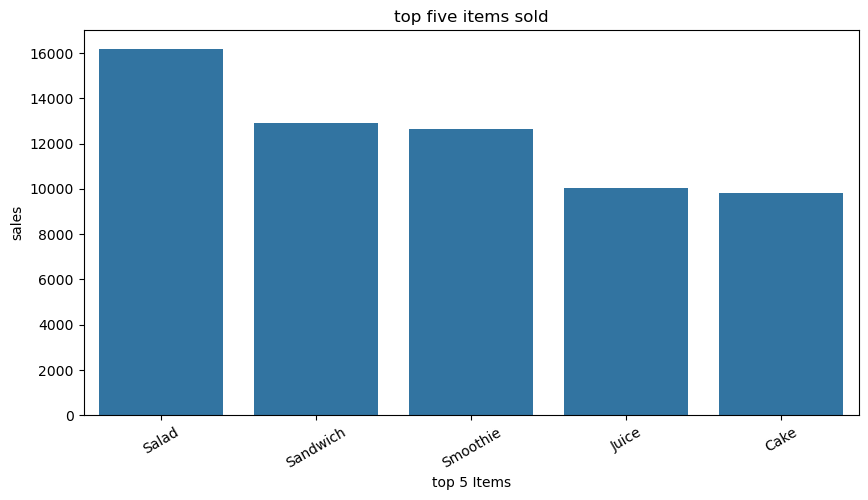

In [142]:
top_five = df.groupby("Item")["Total Spent"].sum().sort_values(ascending = False).head(5)
plt.figure(figsize=(10,5))
sn.barplot(x = top_five.index , y = top_five.values)
plt.xlabel("top 5 Items")
plt.ylabel("sales")
plt.title("top five items sold")
plt.xticks(rotation=30)
plt.show()

#### 2- Most freq sold

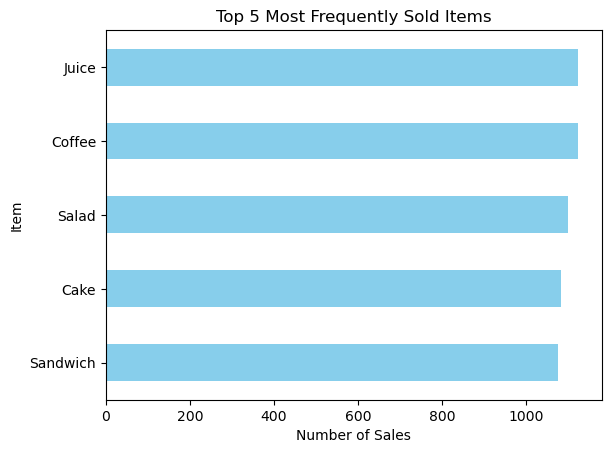

In [152]:
df["Item"].value_counts().head().sort_values().plot(kind='barh', color='skyblue')  #horizontal bar graph
plt.title("Top 5 Most Frequently Sold Items")
plt.xlabel("Number of Sales")
plt.ylabel("Item")
plt.show()


#### 3- Monthly sales trend (line plot)

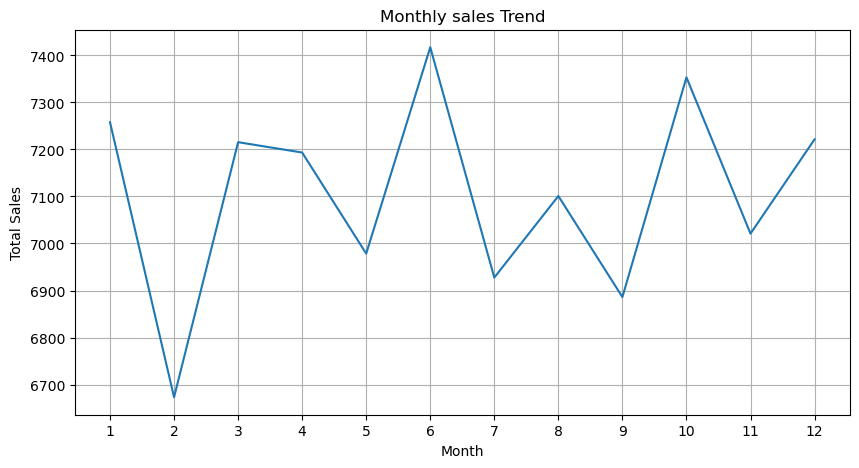

In [120]:
monthly_sales = df.groupby("Month")["Total Spent"].sum()

plt.figure(figsize  = (10,5))
sn.lineplot(x = monthly_sales.index , y = monthly_sales.values)
plt.title("Monthly sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

#### 4- Payment method popularity

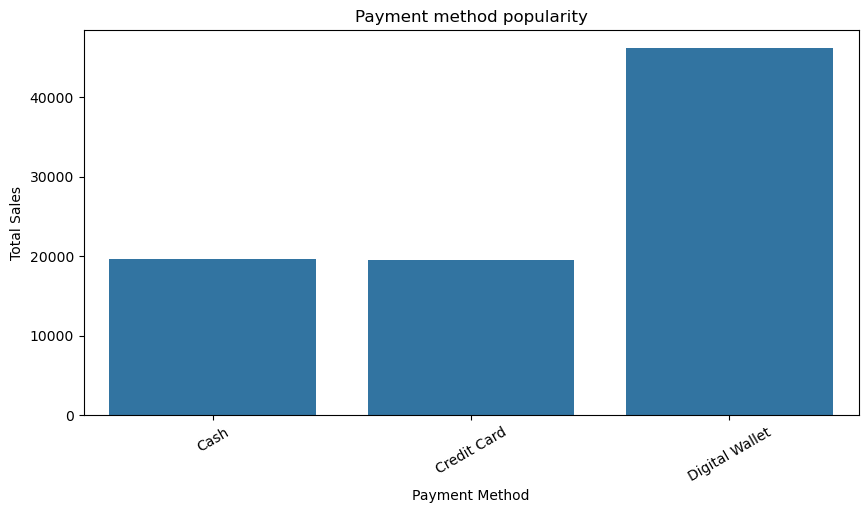

In [121]:
payment_sales = df.groupby("Payment Method")["Total Spent"].sum()
plt.figure(figsize=(10, 5))
sn.barplot(x=payment_sales.index, y=payment_sales.values)
plt.title("Payment method popularity")
plt.xlabel("Payment Method")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.show()


## 🔍 Insights & Conclusion

1. **Top Revenue-Generating Items**: Salad, Sandwich, and Smoothie were the most profitable.
2. **Most Frequently Sold Items**: Juice and Coffee showed the highest volume of sales.
3. **Monthly Sales Trends**: October and June had the highest sales, indicating seasonal patterns.
4. **Payment Preferences**: Digital Wallets were the most popular payment method.
5. **Data Cleaning**: Handled missing values, wrong data types (like 'ERROR'), and unknown values effectively.

>This analysis helps the café understand popular products, peak sales months, and preferred payment methods.
